## Instrucciones:

### Pregunta 1 - Bajando y formateando datos del Banco Mundial

Replique el ejemplo práctico de importar datos desde la API del Banco
Mundial y empezar la base para su análisis de series de tiempo.

Importe usted la serie de GDP total Y Percapita para otro país serie
desde la API del Banco mundial, muestre sus principales características
y realice un grafico.

¿pareciera haber tendencias?


In [29]:
#Importamos librerías ecesarias
#%pip install pandas_datareader
#%pip install matplotlib
#%pip install scipy
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import f_oneway


In [2]:
dsid = wb.search('gdp')
dsid = dsid[ dsid['id'] == 'NY.GDP.PCAP.KD' ]
dsid

,id,name,unit,source,sourceNote,sourceOrganization,topics
10653,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth


In [3]:
dsid = wb.search('gdp')
dsid = dsid[ dsid['id'] == 'NY.GDP.MKTP.CD' ]
dsid

,id,name,unit,source,sourceNote,sourceOrganization,topics
10632,NY.GDP.MKTP.CD,GDP (current US$),,World Development Indicators,GDP at purchaser's prices is the sum of gross ...,"b'World Bank national accounts data, and OECD ...",Economy & Growth


In [5]:
#Creemos un dataframe con los datos de GDP x capita de un país (country)
#NY.GDP.PCAP.KD es GDP per capita (constant 2010 US$)
p = 'BR'
pp = 'BRASIL'
df_GDPpc_p = wb.download(
                    #Use the indicator attribute to identify which indicator or indicators to download
                    indicator='NY.GDP.PCAP.KD',
                    #Use the country attribute to identify the countries you want data for
                    country=[p],
                    #Identify the first year for which you want the data, as an integer or a string
                    start='1980',
                    #Identify the last year for which you want the data, as an integer or a string
                    end=2020
                )

#df_GDPpc_p.describe()
#df_GDPpc_p.info()
df_GDPpc_p.head(10)

NY.GDP.PCAP.KD
country year                
Brazil  2020     8255.567064
        2019     8592.210218
        2018     8553.864918
        2017     8470.939629
        2016     8426.842251
        2015     8783.214413
        2014     9183.458670
        2013     9216.131219
        2012     9025.312958
        2011     8935.276286

In [6]:
#Obtengamos ahora el GDP del mismo país
#NY.GDP.MKTP.CD." This code stands for "GDP at market prices" and represents the total economic output of a country or region in current U.S. dollars.
#It is a measure of the overall size and value of an economy.
#New York, GDP, MKTP es market prices, CD es current dollars

df_GDP_p = wb.download(
                    #Use the indicator attribute to identify which indicator or indicators to download
                    indicator='NY.GDP.MKTP.CD.',
                    #Use the country attribute to identify the countries you want data for
                    country=[p],
                    #Identify the first year for which you want the data, as an integer or a string
                    start='1980',
                    #Identify the last year for which you want the data, as an integer or a string
                    end=2020
                )

#df_GDP_p.describe()
#df_GDP_p.info()

df_GDP_p.head(10)

NY.GDP.MKTP.CD.
country year                 
Brazil  2020     1.476107e+12
        2019     1.873288e+12
        2018     1.916934e+12
        2017     2.063515e+12
        2016     1.795693e+12
        2015     1.802212e+12
        2014     2.456044e+12
        2013     2.472819e+12
        2012     2.465228e+12
        2011     2.616157e+12

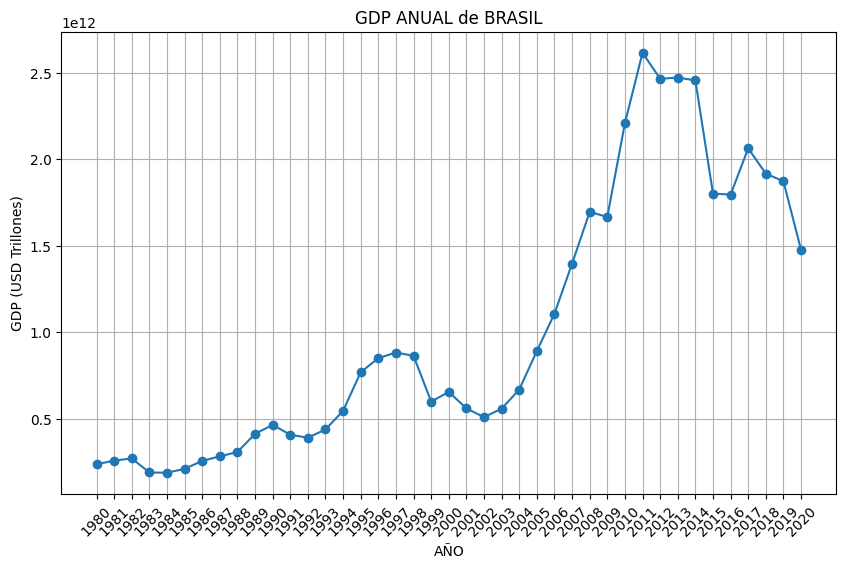

In [7]:
#TOMA LOS DATOS DE GDP, LOS ORDENA OPOR AÑO Y LOS GRAFICA

# CREAMOS UNA COPIA, LA ORDENAMOS Y LA GRAFICAMOS
df_GDP = df_GDP_p.copy()
df_GDP_sorted = df_GDP.sort_index(level=1, ascending=True)
years = [year for (_, year) in df_GDP_sorted.index]
# Step 2: Plot the 'NY.GDP.MKTP.CD.' column
plt.figure(figsize=(10, 6))
plt.plot(years, df_GDP_sorted['NY.GDP.MKTP.CD.'], marker='o', linestyle='-')
plt.title(f"GDP ANUAL de {pp}")
plt.xlabel('AÑO')
plt.ylabel('GDP (USD Trillones)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)  # Add gridlines for better readability
plt.show()


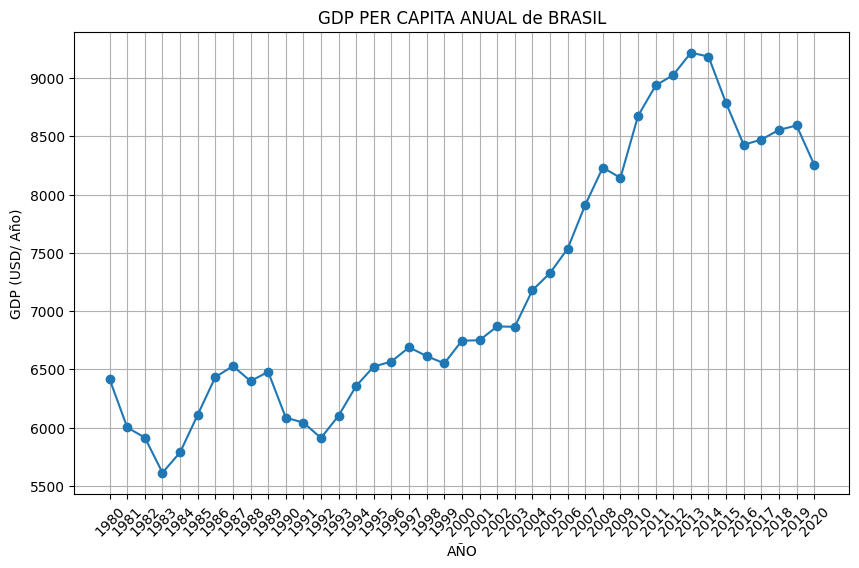

In [8]:
#TOMA LOS DATOS DE GDP PER CAPITA, LOS ORDENA OPOR AÑO Y LOS GRAFICA
#el dataset es: df_GDPpc_p NY.GDP.PCAP.KD

# CREAMOS UNA COPIA, LA ORDENAMOS Y LA GRAFICAMOS
df_GDPpc = df_GDPpc_p.copy()
df_GDPpc_sorted = df_GDPpc.sort_index(level=1, ascending=True)
years = [year for (_, year) in df_GDPpc_sorted.index]
plt.figure(figsize=(10, 6))
plt.plot(years, df_GDPpc_sorted['NY.GDP.PCAP.KD'], marker='o', linestyle='-')
plt.title(f"GDP PER CAPITA ANUAL de {pp}")
plt.xlabel('AÑO')
plt.ylabel('GDP (USD/ Año)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)  # Add gridlines for better readability
plt.show()


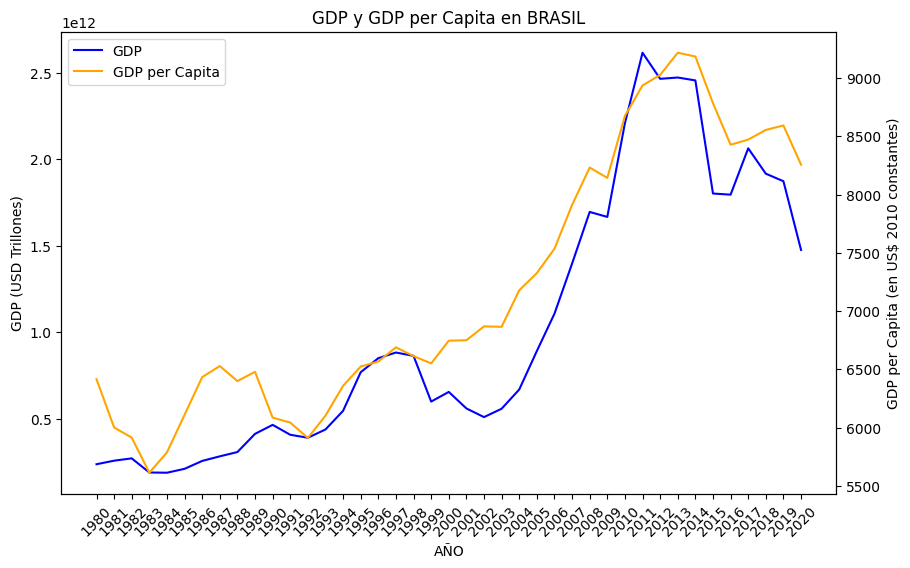

In [9]:
#GRAFICAMOS AMBOS
#Graficamos GDP y GDP per cap en un mismo gráfico para hacer un análisis visual e identificar algún patrón en la data

# Assuming 'GDPxCAP' and 'GDP' are the names of your DataFrames
#df_GDPpc_sorted, df_GDP_sorted

# Reset index for both DataFrames
df_GDPpc_sorted_reset = df_GDPpc_sorted.reset_index()
df_GDP_sorted_reset = df_GDP_sorted.reset_index()

# Extract years and GDP values
years = df_GDP_sorted_reset['year']
df_GDP_sorted_values = df_GDP_sorted_reset['NY.GDP.MKTP.CD.']
df_GDPpc_sorted_values = df_GDPpc_sorted_reset['NY.GDP.PCAP.KD']

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot GDP
ax.plot(years, df_GDP_sorted_values, label='GDP', color='blue')

# Plot GDP per Capita on a secondary y-axis
ax2 = ax.twinx()
ax2.plot(years, df_GDPpc_sorted_values, label='GDP per Capita', color='orange')

# Set labels and titles
ax.set_xlabel('AÑO')
ax.set_ylabel('GDP (USD Trillones)')
ax2.set_ylabel('GDP per Capita (en US$ 2010 constantes)')
plt.title(f"GDP y GDP per Capita en {pp}")

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# Add legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Show the plot
plt.show()


In [10]:
#Separamos las dos series que queremos correlacionar: df_GDPpc_sorted, df_GDP_sorted
GDP = df_GDP_sorted['NY.GDP.MKTP.CD.']
GDP_per_cap = df_GDPpc_sorted['NY.GDP.PCAP.KD']

# Usamos el método corr para calcular la correlación
correlation = GDP.corr(GDP_per_cap)
print(f"La correlación entre GDP y GDP per cap en {pp} es: {correlation}")

La correlación entre GDP y GDP per cap en BRASIL es: 0.9674066966771737


# Principales conclusiones:

*   En los primeros años (1980-1985), hay cierta variabilidad, pero en general,
los valores fluctúan alrededor de un rango similar.

*   A partir de mediados de la década de 1980 hasta finales de la década de  
 1990, se observa una tendencia ascendente en los valores. El GDP per Capita muestra un crecimiento constante durante este período.

* A principios de la década de 2000, los valores siguen aumentando, aunque a un ritmo un poco más lento que en la década anterior.

* Entre 2004 y 2008, hay un aumento significativo en los valores del GDP per Capita.   

* Después de 2008, durante la crisis financiera global, los valores disminuyen temporalmente, pero luego se recuperan y continúan aumentando.

*  A partir de 2010, los valores muestran una tendencia general al alza, aunque con algunas fluctuaciones anuales.

* En los últimos años (2018-2022), los valores siguen aumentando, aunque la tasa de crecimiento parece ser más moderada.  

En resumen, podemos observar una tendencia general al crecimiento en el GDP per Capita a lo largo del tiempo, especialmente desde mediados de la década de 1980 hasta la década de 2000 y nuevamente desde 2010 hasta la fecha más reciente. Sin embargo, es importante tener en cuenta que hubo períodos de fluctuación y eventos económicos, como la crisis financiera global, que impactaron temporalmente en la tendencia. La tendencia a largo plazo es positiva, lo que sugiere un aumento en el ingreso per cápita en el período analizado.

En resumen, podemos observar que durante los 41 años muestreados, Brasil ha experimentado un crecimiento económico generalmente positivo (**tendencia alcista**), aunque con algunos momentos de altibajos marcados.

 * 1983 se destaca como el año con el PIB más bajo registrado en estos 41 años.
 * 1990 fue otro duro año para Brasil ya que su PIB se redujo en un 6% aprox
 * A contar de 2010 sufre un aumento exponencialmente alto que se mantendrá hasta 2013.
 * 2013 fue un año notable, ya que marcó el punto más alto en el PIB, sin embargo, a partir de ese año comenzó un declive que persiste hasta la actualidad (2020).


### Pregunta 2 - Investigando sobre países:

Considere que tenemos los datos del banco mundial, del país que
selecciono anteriormente, y desea aprender sobre alguna caracterpistica
de dicho pais en el periodo.

Escriba una pregunta de investigación que se pueda responder con los
datos disponibles. ¿Cómo definiria la variable aleatoria relevante? ¿Qué
hipótesis podria responder su pregunta?


In [11]:
# Define the indicators you want to retrieve (replace with your desired indicators)
indicators = {
    "SH.DYN.MORT": "Mortality rate, under-5 (per 1,000 live births)",
    "SP.POP.TOTL": "Population, total",
}

countries = [p]

# Set the date range
data_date = ("1980", "2020")

df_Mort_p = wb.download(
                    #Use the indicator attribute to identify which indicator or indicators to download
                    indicator='SH.DYN.MORT',
                    #Use the country attribute to identify the countries you want data for
                    country=[p],
                    #Identify the first year for which you want the data, as an integer or a string
                    start='1980',
                    #Identify the last year for which you want the data, as an integer or a string
                    end=2020
                )

# Fetch the data from the World Bank API
# Print the retrieved data
df_Mort_p.head()

SH.DYN.MORT
country year             
Brazil  2020         14.7
        2019         14.9
        2018         15.2
        2017         15.4
        2016         16.7

In [12]:
#UNAMOS LOS DATAFRAME DE MORTALIDAD e INGRESO PC EN UNO SOL DF PARA GRAFICARLO
#Unamos los dos dataframe en uno: df_GDPpc_p Y df_Mort_p
df_1 = pd.merge(df_GDPpc_p, df_Mort_p, how='right', on='year')
df_1.describe()

,NY.GDP.PCAP.KD,SH.DYN.MORT
count,41.000000,41.000000
mean,7190.314501,42.380488
std,1116.555886,25.741564
min,5613.610873,14.700000
25%,6399.483631,18.600000
50%,6745.856994,34.700000
75%,8255.567064,63.200000
max,9216.131219,96.300000


In [13]:
#ORDENEMOS LOS DF POR AÑO
#Ordenamos primero el de GDP x CAP
#Lo copio par que no me modifique el dataframe original
df_GDPpc_p.head()
df_GDPpc_p_copy = df_GDPpc_p.copy()
#reseteo el índice
df_GDPpc_p_copy.reset_index(inplace = True)
#Ahora lo ordeno
df_GDPpc_p_copy_sorted = df_GDPpc_p_copy.sort_values(by='year')
#Reseteo el indice
df_GDPpc_p_copy_sorted.set_index(['year'], inplace=True)
df_GDPpc_p_copy_sorted.head()


,country,NY.GDP.PCAP.KD
year,,
1980,Brazil,6415.637075
1981,Brazil,6001.644299
1982,Brazil,5914.564397
1983,Brazil,5613.610873
1984,Brazil,5788.086505


In [14]:
#ORDENEMOS LOS DF POR AÑO
#Ahora ordenamos el de Mortalidad
#Lo copio par que no me modifique el dataframe original
#df_Mort_p

df_Mort_p_copy = df_Mort_p.copy()
#reseteo el índice
df_Mort_p_copy.reset_index(inplace = True)
#Ahora lo ordeno
df_Mort_p_copy_sorted = df_Mort_p_copy.sort_values(by='year')
#Reseteo el indice
df_Mort_p_copy_sorted.set_index(['year'], inplace=True)
df_Mort_p_copy_sorted.head()

,country,SH.DYN.MORT
year,,
1980,Brazil,96.3
1981,Brazil,92.0
1982,Brazil,87.8
1983,Brazil,84.0
1984,Brazil,80.4


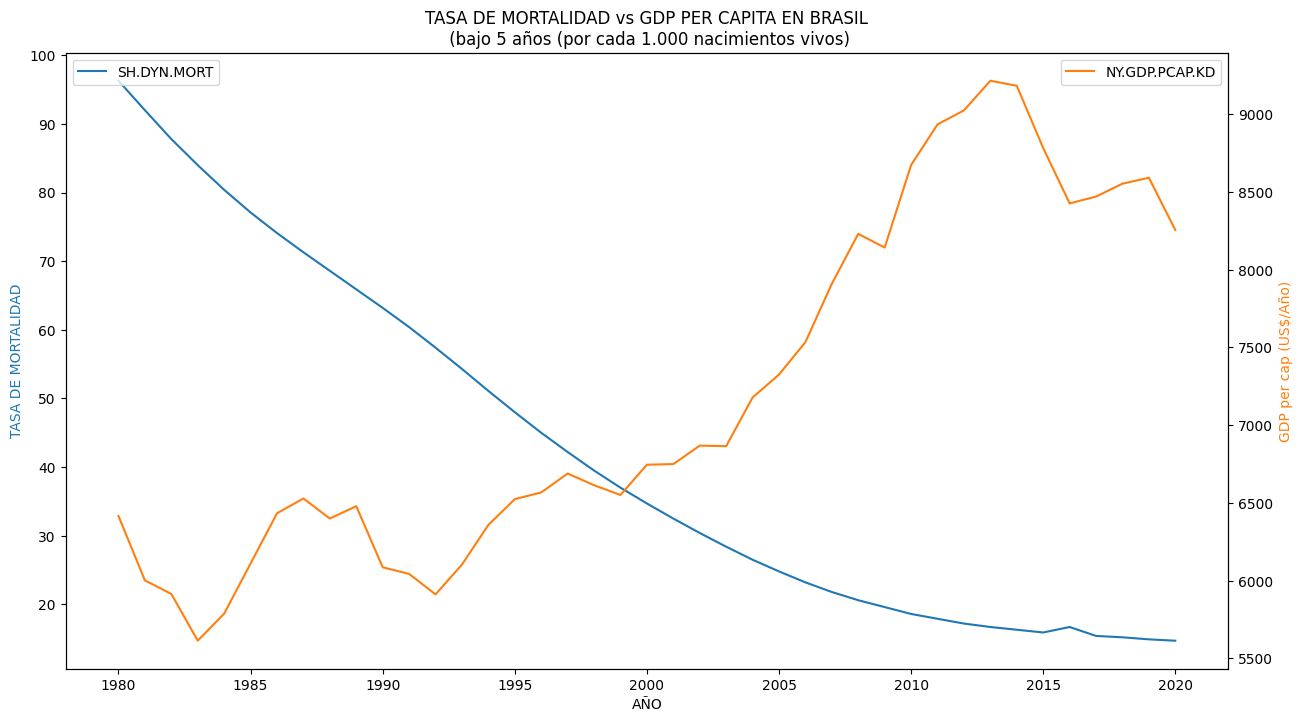

In [15]:
#GRAFIQUEMOS MORTALIDAD e INGRESO X CAP
import matplotlib.pyplot as plt

#df_Mort_p_copy_sorted
#df_GDPpc_p_copy_sorted

# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize = (15, 8))

#Recordar que: SH.DYN.MORT": "Mortality rate, under-5 (per 1,000 live births)
# Plot Mortalidad data on the primary axis
df_Mort_p_copy_sorted['1980':].plot(ax=ax1, label='MORTALIDAD (xx/xx)', color='tab:blue')

# Set y-axis label for the primary axis
ax1.set_ylabel('TASA DE MORTALIDAD', color='tab:blue')

# Create a secondary axis sharing the same x-axis
ax2 = ax1.twinx()

plt.title(f"TASA DE MORTALIDAD vs GDP PER CAPITA EN {pp}\n (bajo 5 años (por cada 1.000 nacimientos vivos)")

# Plot GDP per capita data on the secondary axis
df_GDPpc_p_copy_sorted['1980':].plot(ax=ax2, label='GDP per cap (US$/Año)', color='tab:orange')

# Set y-axis label for the secondary axis
ax2.set_ylabel('GDP per cap (US$/Año)', color='tab:orange')

# Set x-axis label
ax1.set_xlabel('AÑO')

# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

PRUEBA DE HIPÓTESIS:

H0: no hay correlación significativa entre la  mortalidad y el GDP per Capita

H1: existe una correlación negativa significativa entre la mortalidad y el GDP per capita

In [17]:
#CALCULEMOS LA CORRELACIÓN ENTRE MORTALIDAD e GDP PER CAPITa
#Las series son: NY.GDP.PCAP.KD	y NY.GDP.MKTP.CD.

#Separamos las dos series que queremos corelacionar
MORT = df_Mort_p_copy_sorted['SH.DYN.MORT']
GDP_per_cap = df_GDPpc_p_copy_sorted['NY.GDP.PCAP.KD']

# Usamos el método corr para calcular la correlación
correlacion = MORT.corr(GDP_per_cap)
if correlacion >= 0:
    print(f"La correlación entre MORTALIDAD y GDP per cap en {pp} es: ", correlacion)
else:
    print(f"La correlación entre MORTALIDAD y GDP per cap en {pp} es INVERSA: ", correlacion)

La correlación entre MORTALIDAD y GDP per cap en BRASIL es INVERSA:  -0.8459411434089594


In [20]:
#CÁLCULO DEL P VALOR
# Calcular la t-test para dos muestras independientes
t_stat, p_value = stats.ttest_ind(MORT, GDP_per_cap)
correlation, p_value = stats.pearsonr(MORT, GDP_per_cap)
print(f'Coeficiente de correlación: {correlation}')
print(f'P-valor: {p_value}')

Coeficiente de correlación: -0.8459411434089595
P-valor: 3.3366070131701106e-12


##EN CONCLUSIÓN SOBRE EL P VALOR: ?? Parece ser suficientemente pequeño 3.33 x 10 e -12. Aceptamos o rechazamos H0?

El **Valor de probabilidad (ó p-valor)** es el nivel probabilidad más
alto para el cual no podemos rechazar la hipótesis nula de la prueba de
significancia.


### Pregunta 3 - Ejemplo AB test en Marketing:

#### Enunciado

Imaginemos que trabajamos en una empresa de e-commerce que vende
productos electrónicos y queremos aumentar las ventas en una línea de
productos específica, como teléfonos móviles.

Para ello, decidimos utilizar una promoción de ventas basada en una
ruleta lúdica que ofrecerá descuentos a los clientes que la utilicen.

Para implementar la promoción, primero seleccionamos aleatoriamente un
grupo de clientes y les enviamos un correo electrónico con un enlace a
la ruleta lúdica. Al hacer clic en el enlace, los clientes son
redirigidos a una página en la que pueden girar la ruleta y ganar un
descuento en su próxima compra.

Vamos a pensar que los clientes son asignados a uno de los siguientes
grupos: - Control: no les da una promoción (mala suerte, intentalo otra
vez) - Tratamiento 1: 20% de descuento en el producto - Tratamiento 2:
Un complemento gratuito (carcasa) que tiene un costo para la empresa
similar al descuento.

#### Creación de los datos

Como nuestro caso es un ejemplo ficticio, vamos a crear los datos.

Este código creará un conjunto de datos con 400 observaciones (200 en el
grupo de control y 200 en el grupo de tratamiento), donde se simulan
lascompras de cada usuario.

In [23]:
import numpy as np
import pandas as pd
import random

# Define una semilla para la generación de números aleatorios
np.random.seed(123)
random.seed(123)

# Crear un vector de 200 valores aleatorios para el grupo de control
control = np.random.choice(["Control"], size=200, replace=True)

# Crear un vector de 200 valores aleatorios para el grupo de tratamiento
tratamiento = np.random.choice(["Treatment 1", "Treatment 2"], size=100, replace=True, p=[0.7, 0.3])

# Crear un vector de número de compras para cada grupo
control_compras = np.random.binomial(5, 0.2, size=200)
tratamiento1_compras = np.random.binomial(5, 0.4, size=100)
tratamiento2_compras = np.random.binomial(5, 0.6, size=100)

# Combinar los vectores en un DataFrame
data = {
    'grupo': np.concatenate((control, np.repeat("Treatment", 200))),
    'tipo_tratamiento': np.concatenate((np.repeat("Control", 200), np.repeat(["Treatment 1", "Treatment 2"], [100, 100]))),
    'ventas': np.concatenate((control_compras, tratamiento1_compras, tratamiento2_compras))
}

ventas_df = pd.DataFrame(data)

# Verificar el DataFrame
ventas_df.head(5)

,grupo,tipo_tratamiento,ventas
0,Control,Control,1
1,Control,Control,1
2,Control,Control,0
3,Control,Control,0
4,Control,Control,0


Estudiemos si la promoción fue efectiva en estos datos. Para esto:

1.  Describa los resultados de la promocion para los diferentes grupos,
    en terminos de estadisticas descriptivas.


In [24]:
ventas_df.describe()

,ventas
count,400.000000
mean,1.755000
std,1.322629
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,5.000000


**count:** Hay un total de 400 observaciones en la columna "ventas".

**mean:** La media (promedio) de las ventas es aproximadamente 1.755. Esto significa que, en promedio, se venden alrededor de 1.755 unidades de un producto en las observaciones.

**std:** La desviación estándar es aproximadamente 1.3226. Esto indica que las ventas tienden a variar alrededor de la media en aproximadamente 1.3226 unidades. Cuanto mayor sea la desviación estándar, mayor será la dispersión de los datos.

**min:** El valor mínimo de las ventas es 0. Esto significa que en algunas observaciones, no se vendió ninguna unidad del producto.

**25%:** El percentil 25 (Q1) es igual a 1. Esto significa que el 25% de las observaciones tienen ventas iguales o menores a 1 unidad.

**50%:** La mediana (percentil 50) es igual a 2. Esto significa que el 50% de las observaciones tienen ventas iguales o menores a 2 unidades.

**75%:** El percentil 75 (Q3) es igual a 3. Esto significa que el 75% de las observaciones tienen ventas iguales o menores a 3 unidades.

**max:** El valor máximo de las ventas es 5. Esto indica que en algunas observaciones se vendieron hasta 5 unidades del producto, que es el valor máximo registrado en el conjunto de datos.

2.  Compare visualmente los resultados de los diferentes grupos.

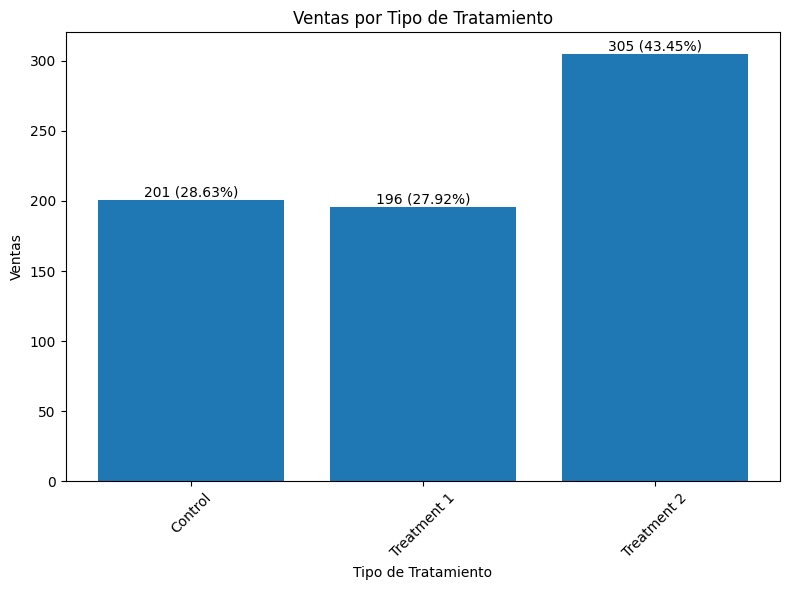

In [25]:
# Agrupar por 'grupo' y 'tipo_tratamiento' y calcular la suma de 'ventas'
ventas_por_grupo_tipo = ventas_df.groupby(['tipo_tratamiento'])['ventas'].sum().reset_index()

# Calcular el total de ventas
total_ventas = ventas_por_grupo_tipo['ventas'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(ventas_por_grupo_tipo['tipo_tratamiento'], ventas_por_grupo_tipo['ventas'])
plt.xlabel('Tipo de Tratamiento')
plt.ylabel('Ventas')
plt.title('Ventas por Tipo de Tratamiento')
plt.xticks(rotation=45)

# Agregar etiquetas de cantidades y porcentaje en la parte superior de las barras
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / total_ventas) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{round(yval, 2)} ({round(percentage, 2)}%)', ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

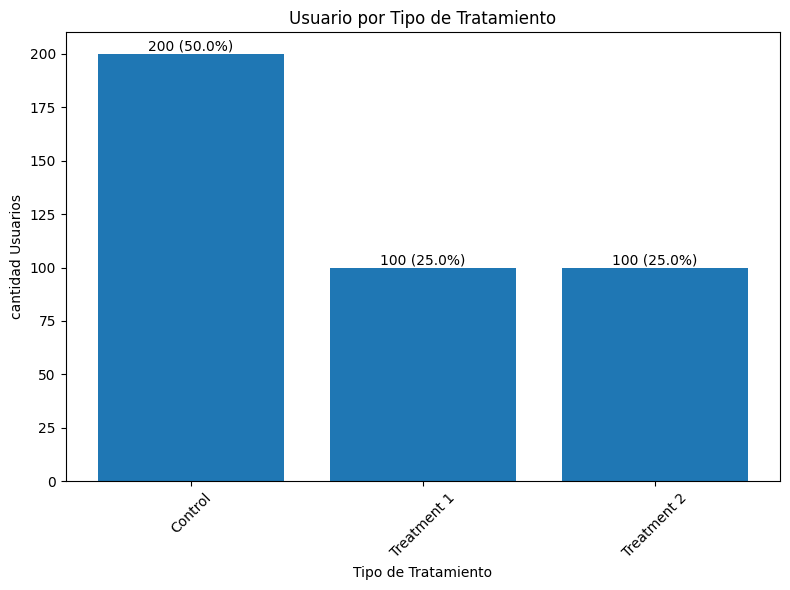

In [26]:
# Agrupar por 'grupo' y 'tipo_tratamiento' y calcular la suma de 'ventas'
UsuarioPorTipoTratamiento0 = ventas_df[['tipo_tratamiento', 'grupo']]
UsuarioPorTipoTratamiento = UsuarioPorTipoTratamiento0.groupby("tipo_tratamiento", as_index=False).count()

total_usuarios = UsuarioPorTipoTratamiento['grupo'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(UsuarioPorTipoTratamiento['tipo_tratamiento'], UsuarioPorTipoTratamiento['grupo'])
plt.xlabel('Tipo de Tratamiento')
plt.ylabel('cantidad Usuarios')
plt.title('Usuario por Tipo de Tratamiento')
plt.xticks(rotation=45)

# Agregar etiquetas de cantidades y porcentaje en la parte superior de las barras
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / total_usuarios) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{round(yval, 2)} ({round(percentage, 2)}%)', ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


3.  ¿Fue la promocion efectiva? Use una prueba de hipotesis para
    analizar el grupo tratado y de control.

4.  ¿Cual de las promociones fue más efectiva? Use una prueba ANOVA.

In [30]:
# Realizar la prueba de ANOVA para comparar los grupos
grupo_control = ventas_df[ventas_df['tipo_tratamiento'] == 'Control']['ventas']
grupo_experimental1 = ventas_df[ventas_df['tipo_tratamiento'] == 'Treatment 1']['ventas']
grupo_experimental2 = ventas_df[ventas_df['tipo_tratamiento'] == 'Treatment 2']['ventas']

f_statistic, p_value = f_oneway(grupo_control, grupo_experimental1, grupo_experimental2)

print("Estadísticas de ANOVA:")
print(f"Valor F: {f_statistic}")
print(f"Valor p: {p_value}")

# Interpretar los resultados
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre los grupos.")
else:
    print("No se puede rechazar la hipótesis nula. No hay diferencias significativas entre los grupos.")

Estadísticas de ANOVA:
Valor F: 136.50009671530648
Valor p: 7.656712991602311e-46
Se rechaza la hipótesis nula. Hay diferencias significativas entre los grupos.


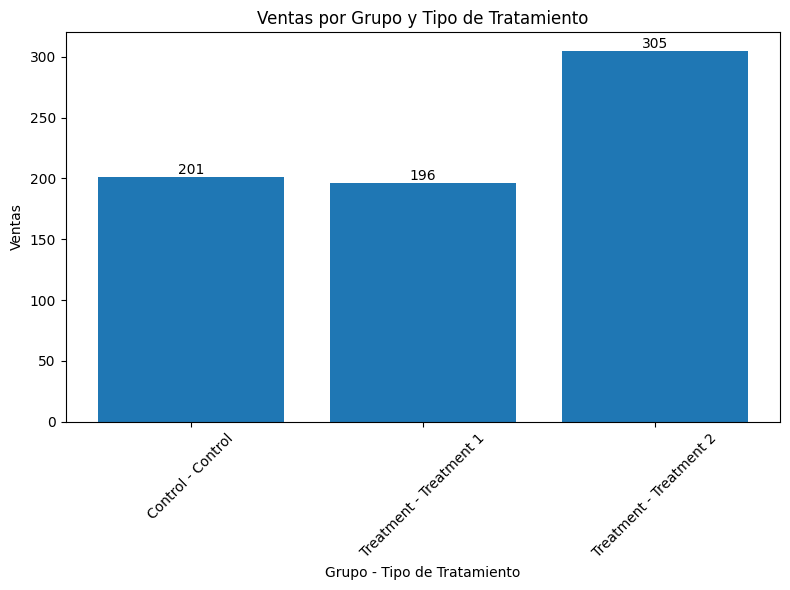

In [31]:
# Agrupar por 'grupo' y 'tipo_tratamiento' y calcular la suma de 'ventas'
ventas_por_grupo_tipo = ventas_df.groupby(['grupo', 'tipo_tratamiento'])['ventas'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(ventas_por_grupo_tipo['grupo'] + ' - ' + ventas_por_grupo_tipo['tipo_tratamiento'], ventas_por_grupo_tipo['ventas'])
plt.xlabel('Grupo - Tipo de Tratamiento')
plt.ylabel('Ventas')
plt.title('Ventas por Grupo y Tipo de Tratamiento')
plt.xticks(rotation=45)

# Agregar etiquetas de cantidades al lado de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{int(yval)}', ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Pregunta 4 - Caso aplicación: Cursos de Verano

Vamos a usar una situación ficticia, con datos simulados para poder
aplicar de manera consisa los diferentes tipos de estrategias de
identificación revisadas en clase. Algunas (que se supone ya manejan)
las revisaremos muy rápidamente y en otras, vamos a tener mayor énfasis.

### Pregunta de investigación

Nuestro objetivo es responder la siguiente pregunta **ficticia** de
investigación:

> Asistir a cursos de verano mejora los resultados académicos?

Para responder esta pregunta, usaremos unos datos **ficticios y
simulados**

### Contexto

La pregunta de investigación se inspira en trabajos como el de
[Matsudaira
(2007)](https://www.sciencedirect.com/science/article/pii/S0304407607001194?casa_token=hnnF764CKPoAAAAA:5b9WhCManNDsdW4SmOHnnzNr0fZIarW8s6EsvpQW7MdUt470eNPmN2T8IFCsNc6Iajew5tEeNA)
e intervenciones en estudiantes de bajo nivel socioeconómico por
[Dietrichson et al (
2017)](https://journals.sagepub.com/doi/abs/10.3102/0034654316687036).

El **escenario ficticio** es el siguiente:

-   Para un conjunto de colegios en una comuna, existe la opción de
    asistir a un curso de verano intensivo durante el verano entre 5 y
    6to básico.
-   El curso de verano se enfoca en mejorar las habilidades académicas
    de preparar la prueba de admisión a la universidad vigente (PSU en
    ese momento)
-   El curso de verano es gratuito, pero para ser matriculados requiere
    que los padres se involucren en un proceso.
-   Estamos interesados en testear el impacto de la participación en el
    curso en los resultados académicos de los estudiantes.

### Datos ficticios dispobibles

Los datos estan disponibles en
[github](https://github.com/melanieoyarzun/web_analisisdatos_IDS_S223/tree/main/data)

1.  school_data_1.csv

-   Usamos esta data para ejemplificar como cargar data guardada en
    formato csv.
-   Este dataset tiene información sobre cada individuo (con
    identificador id), la escuela a la que asiste, un indicador si
    participó en el curso de verano, sexo, ingreso del hogar (en
    logaritmo), educación de los padres, resultados en una prueba
    estandarizada que se realiza a nivel de la comuna tanto para el año
    5 como para el año 6.

1.  school_data_2.dta

-   Usamos esta data para ejemplificar como cargar data guardada en
    formato STATA.
-   Este dataset tiene información de cada individuo (con identificador
    id).
-   Este dataset tiene la información si el individuo recibió la carta
    de invitación para participar del curso de verano.

1.  school_data_3.xlsx

-   Usamos este dataset para practicar como cargar datos guardados en
    formato Microsoft Excel.
-   Este dataset incluye datos sobre cada individuo (con identificador
    id)
-   Este dataset tiene información de rendimiento académico antes y
    después del curso de verano.

## Objetivos:

La idea de este taller es poner en práctica los primeros pasos para un
análisis:

I. Este proceso generalmente incluye cargarlos, inspeccionarlos, limpiar
y dar la estructura deseada.

1.  También exploraremos los datos, usaremos estadísticas descriptivas
    que nos den una idea y resolver problemas potenciales (missing,
    ouliers, etc) antes de estimar cualquier modelo.

En la vida real, este proceso suele ser bastante largo, laborioso e
implica volver sobre lso pasos anteriores múltiples veces. También
invlocura tomar desiciones por parte de los investigadores, por lo cual
la documentación de esta fase es especialmente importante.

En nuestro caso, será bastante lineal y directo, ya que son datos
ficticios simulados. Pero en la realidad, no suele ser así.

Pasos que debe realizar:

### 1. Preparación de los datos

1.1. Cargue las tres bases de datos

1.2. Unir los datasets

Tenemos 3 bases de datos con información diferente de los mismos
individuos. Generalmente es buena idea tener una sola gran tabla con
toda esta información, especialmente si estimaremos modelos en base a
ésta.

La base de datos 1 y 2 tienen una forma similar: los individuos son
filas y las variables columnas y hay una sola fila para cada individuo.
Empiece uniendo ambos.

-   Notemos que el dataset unido debería tener 3491 filas y 9 columnas.
    Unimos todas las filas y agregamos al dataset de información del
    estudiante si recibió o no la carta (school_data_2)

Entonces, siga el siguiente flujo de trabajo:

1.  Unimos *school_data_1* y *school_data_2* usando como variable de
    unión *person_id* y guardamos el dataset unido como *school_data*.

2.  Unimos *school_data_3* con *school_data* y sobre-escribimos
    *school_data*.

    Notar que acá unimos por las columnas *person_id* y *school_id*.
    Esto no es realmente necesario porque cada estudiante con id única
    tiene un solo colegio, pero sirve de ejemplo en como usar más de una
    columna mediante.

3.  Usamos la función `summary()` para obtener una estadística
    descriptiva de las variables en el dataset unido.

### 2. Preparar los datos

2.1 Tidyng los datos

Ahora que hemos unido las bases de datos, trataremos de que satisfazgan
los principios de [Tidy
Data](https://vita.had.co.nz/papers/tidy-data.pdf).

Un data frame se considera “tidy” (Según Hadley) si se cumplen las
siguientes condiciones:

-   Cada columna (variable) contiene todas las medidas de la misma
    data/feature/caracteristica de las observaciones.
-   Cada fila contiene medidas de la misma unidad de observación.

(puedes profundizar y ver más ejemplos aplicados en
<https://sscc.wisc.edu/sscc/pubs/DWE/book/6-2-tidy-data.html> )

Uno de estos, es que cada columna debe ser una variable y cafa fila una
unidad de observación.

Si inspeccionamos el número de columnas: Son 17, pero tenemos 9
variables.

Es porque tenemos puntajes de las pruebas del año 2 al 10. Este tipo de
datos son de *panel*

Generalmente, que hacemos con este tipo de datos depende del tipo de
modelos que queramos usar. Si bien el formato wide es facil de entender,
generlamente para modelos y análisi preferimos que esté en formato long.
Especialmente cuando modelamos incluyendo efectos fijos También es este
el que adhiere a los principios tidy de mejor manera.

Para cambiar a long, usamos `melt()`

Ahora tenemos nuestros datos listos para que los inspeccionemos.

2.2 Selección de muestra

Ya que contamos con datos que siguen los principios de tidy data, lo
siguiente es seleccionar la muestra apropiada.

En este trabajo, los unicos problemas que podríamos enfrentar son
relacionados con valores faltantes o missing.

Identifique cuantas filas y comunas son, los tipos de varables y número
de missing values.

En estos casos, para *parental_schooling* tenemos 45 missing y para
*test_score* 11.

Asumamos que estos valores missing son random y deseamos remover estas
filas.

2.2 Modificar los datos

Un último paso que haremos antes de hacer estadística decsriptiva es
modificar los datos.

1.  Cambio de nombre columna Cambiaremos los nombres de algunas columnas
    para que se vean bien en la tablas. Vambos renombrar la variable
    summpercap a summer_school.

2.  Estandarizar puntajes En un siguiente paso, vamos a transformar los
    puntajes en la pruebas a una variable que tenga media 0 y desviación
    estándar 1. Es mejor trabajar con variables estandarizadas, ya que
    no requieren conocer el conexto específico de la medida y es más
    facil de comunicar y comparar.

Ya estamos bien, ahora pasamos a conocer mejor nuestros datos con
estadística descriptiva.

### 3. Estadística descriptiva

Hasta ahora, cargamos datos en diversos formatos (csv, dta y xlsx) los
unimos, re-estructuramos el dataset, removimos valores missing y
generamos algunas transformaciones. El siguiente paso es empezar a
conocer nuestros datos. Para esto haremos tablas de estadísticas
descriptivas y también algunos graficos descriptivos.

3.1 Tablas de etsádistocas descriptivas Incluya la media, la desviación
estandar, la mediana, max y min, al menos.

3.2 Gráficos de estadística descriptiva Realice al menos scatter plot,
histograma, box plot y correalograma. r1

In [ ]:
#%pip install seaborn
#%pip install StandardScaler
#%pip install openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [39]:
df1 = pd.read_csv('school_data_1.csv')
df1

,person_id,school_id,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6
0,1,5,0,1,10.0,12.939209,NaN,1.636284
1,2,14,1,0,11.0,14.737391,1.297036,2.561449
2,3,7,1,0,14.0,16.083261,2.761908,3.526002
3,4,8,0,0,12.0,14.608081,1.772913,2.381062
4,5,9,1,0,11.0,13.756785,1.180356,1.959818
...,...,...,...,...,...,...,...,...
3486,3487,7,0,1,11.0,14.326670,2.673548,2.167499
3487,3488,2,1,0,12.0,14.525507,2.475244,2.682903
3488,3489,17,0,1,12.0,15.473269,NaN,2.932665
3489,3490,19,0,0,16.0,16.255371,2.443172,2.341365


In [42]:
df2 = pd.read_stata('school_data_2.dta')
df2

,person_id,letter
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
3486,3487,0.0
3487,3488,1.0
3488,3489,0.0
3489,3490,0.0


In [53]:
    df3 = pd.read_excel('school_data_3.xlsx')
    df3

,person_id,test_year_2,test_year_3,test_year_4,test_year_7,test_year_8,test_year_9,test_year_10,learnings,school_id
0,1,1.090117,1.914594,2.065805,2.377697,2.032904,1.493803,1.880512,10.236394,5
1,2,1.246309,1.154470,1.582455,1.747376,2.444041,1.663050,1.833769,8.278911,14
2,3,2.726472,2.269011,3.247252,3.017764,3.361646,3.387020,2.968617,8.966529,7
3,4,2.693032,2.413203,1.479452,2.637954,3.021940,2.761513,2.088086,8.876466,8
4,5,1.660545,1.828067,1.361972,1.904636,2.109774,2.285818,1.845694,8.770518,9
...,...,...,...,...,...,...,...,...,...,...
3486,3487,2.198542,2.567570,2.677070,2.224623,1.904200,2.011383,2.285860,9.194703,7
3487,3488,2.183005,1.678833,2.658048,2.697586,2.893422,2.456036,2.677294,9.528962,2
3488,3489,2.256085,1.828445,2.286756,2.719165,2.881728,2.488629,1.859447,9.625758,17
3489,3490,3.269776,2.415659,2.697778,2.284438,1.975236,3.199817,2.597650,9.136200,19


In [54]:
school_data = df1.merge(df2, how = 'left', on = 'person_id' )
school_data = school_data.merge(df3, how = 'left', on = ['person_id', 'school_id'] )
school_data

,person_id,school_id,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6,letter,test_year_2,test_year_3,test_year_4,test_year_7,test_year_8,test_year_9,test_year_10,learnings
0,1,5,0,1,10.0,12.939209,NaN,1.636284,0.0,1.090117,1.914594,2.065805,2.377697,2.032904,1.493803,1.880512,10.236394
1,2,14,1,0,11.0,14.737391,1.297036,2.561449,0.0,1.246309,1.154470,1.582455,1.747376,2.444041,1.663050,1.833769,8.278911
2,3,7,1,0,14.0,16.083261,2.761908,3.526002,0.0,2.726472,2.269011,3.247252,3.017764,3.361646,3.387020,2.968617,8.966529
3,4,8,0,0,12.0,14.608081,1.772913,2.381062,0.0,2.693032,2.413203,1.479452,2.637954,3.021940,2.761513,2.088086,8.876466
4,5,9,1,0,11.0,13.756785,1.180356,1.959818,0.0,1.660545,1.828067,1.361972,1.904636,2.109774,2.285818,1.845694,8.770518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,3487,7,0,1,11.0,14.326670,2.673548,2.167499,0.0,2.198542,2.567570,2.677070,2.224623,1.904200,2.011383,2.285860,9.194703
3487,3488,2,1,0,12.0,14.525507,2.475244,2.682903,1.0,2.183005,1.678833,2.658048,2.697586,2.893422,2.456036,2.677294,9.528962
3488,3489,17,0,1,12.0,15.473269,NaN,2.932665,0.0,2.256085,1.828445,2.286756,2.719165,2.881728,2.488629,1.859447,9.625758
3489,3490,19,0,0,16.0,16.255371,2.443172,2.341365,0.0,3.269776,2.415659,2.697778,2.284438,1.975236,3.199817,2.597650,9.136200


In [55]:
summary = school_data.describe()
summary

,person_id,school_id,summercamp,female,parental_schooling,parental_lincome,test_year_5,test_year_6,letter,test_year_2,test_year_3,test_year_4,test_year_7,test_year_8,test_year_9,test_year_10,learnings
count,3491.000000,3491.000000,3491.000000,3491.000000,3486.000000,3491.000000,3485.000000,3486.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000
mean,1746.000000,15.655686,0.458894,0.515325,11.324727,14.562807,2.258909,2.517411,0.246921,2.224587,2.254009,2.249515,2.444453,2.450573,2.453095,2.454057,10.063569
std,1007.909222,8.674339,0.498379,0.499837,1.104628,0.693530,0.684667,0.720642,0.431282,0.676501,0.674030,0.682811,0.742760,0.738015,0.739265,0.736627,1.279010
min,1.000000,1.000000,0.000000,0.000000,10.000000,12.667598,-0.269616,0.282411,0.000000,-0.570077,-0.463976,0.014251,0.031388,-0.185596,-0.245648,-0.304286,5.386084
25%,873.500000,8.000000,0.000000,0.000000,11.000000,14.115008,1.799708,2.007090,0.000000,1.771236,1.817996,1.782818,1.937678,1.927651,1.937140,1.941455,9.180964
50%,1746.000000,15.000000,0.000000,1.000000,11.000000,14.520815,2.258287,2.449218,0.000000,2.237744,2.248572,2.249468,2.368546,2.388875,2.386815,2.377569,10.041026
75%,2618.500000,23.000000,1.000000,1.000000,12.000000,14.946971,2.715426,3.018490,0.000000,2.664371,2.715288,2.709033,2.972072,2.959604,2.986067,2.969251,10.958777
max,3491.000000,30.000000,1.000000,1.000000,23.000000,19.449821,4.689652,4.983078,1.000000,4.737349,4.388531,4.349952,4.771106,5.045062,4.656483,4.929489,14.620796


In [56]:
# Usar melt() para convertir al formato largo
df_long = pd.melt(school_data, id_vars=['person_id', 'school_id', 'summercamp', 'female', 'parental_schooling', 'parental_lincome', 'learnings', 'letter'],
                  var_name='test_year', value_name='test_score')
df_long

,person_id,school_id,summercamp,female,parental_schooling,parental_lincome,learnings,letter,test_year,test_score
0,1,5,0,1,10.0,12.939209,10.236394,0.0,test_year_5,NaN
1,2,14,1,0,11.0,14.737391,8.278911,0.0,test_year_5,1.297036
2,3,7,1,0,14.0,16.083261,8.966529,0.0,test_year_5,2.761908
3,4,8,0,0,12.0,14.608081,8.876466,0.0,test_year_5,1.772913
4,5,9,1,0,11.0,13.756785,8.770518,0.0,test_year_5,1.180356
...,...,...,...,...,...,...,...,...,...,...
31414,3487,7,0,1,11.0,14.326670,9.194703,0.0,test_year_10,2.285860
31415,3488,2,1,0,12.0,14.525507,9.528962,1.0,test_year_10,2.677294
31416,3489,17,0,1,12.0,15.473269,9.625758,0.0,test_year_10,1.859447
31417,3490,19,0,0,16.0,16.255371,9.136200,0.0,test_year_10,2.597650


In [57]:

parental_schooling = nan_count = df_long['parental_schooling'].isna().sum()
parental_schooling

test_score = nan_count = df_long['test_score'].isna().sum()
test_score

print('parental_schooling: ', parental_schooling ,'test_score: ', test_score)

parental_schooling:  45 test_score:  11


In [58]:
df_long_limpieza1 = df_long.dropna(subset=['parental_schooling'])
df_long_limpieza2 = df_long_limpieza1.dropna(subset=['test_score'])
df_long_limpieza2

,person_id,school_id,summercamp,female,parental_schooling,parental_lincome,learnings,letter,test_year,test_score
1,2,14,1,0,11.0,14.737391,8.278911,0.0,test_year_5,1.297036
2,3,7,1,0,14.0,16.083261,8.966529,0.0,test_year_5,2.761908
3,4,8,0,0,12.0,14.608081,8.876466,0.0,test_year_5,1.772913
4,5,9,1,0,11.0,13.756785,8.770518,0.0,test_year_5,1.180356
5,6,26,1,1,11.0,14.705519,10.484683,0.0,test_year_5,2.439802
...,...,...,...,...,...,...,...,...,...,...
31414,3487,7,0,1,11.0,14.326670,9.194703,0.0,test_year_10,2.285860
31415,3488,2,1,0,12.0,14.525507,9.528962,1.0,test_year_10,2.677294
31416,3489,17,0,1,12.0,15.473269,9.625758,0.0,test_year_10,1.859447
31417,3490,19,0,0,16.0,16.255371,9.136200,0.0,test_year_10,2.597650


In [59]:
df_final = df_long_limpieza2.rename(columns={'summercamp':'summer_school'})
df_final

,person_id,school_id,summer_school,female,parental_schooling,parental_lincome,learnings,letter,test_year,test_score
1,2,14,1,0,11.0,14.737391,8.278911,0.0,test_year_5,1.297036
2,3,7,1,0,14.0,16.083261,8.966529,0.0,test_year_5,2.761908
3,4,8,0,0,12.0,14.608081,8.876466,0.0,test_year_5,1.772913
4,5,9,1,0,11.0,13.756785,8.770518,0.0,test_year_5,1.180356
5,6,26,1,1,11.0,14.705519,10.484683,0.0,test_year_5,2.439802
...,...,...,...,...,...,...,...,...,...,...
31414,3487,7,0,1,11.0,14.326670,9.194703,0.0,test_year_10,2.285860
31415,3488,2,1,0,12.0,14.525507,9.528962,1.0,test_year_10,2.677294
31416,3489,17,0,1,12.0,15.473269,9.625758,0.0,test_year_10,1.859447
31417,3490,19,0,0,16.0,16.255371,9.136200,0.0,test_year_10,2.597650


In [60]:
test_scores = df_final['test_score'].values.reshape(-1, 1)

# Inicializar el escalador estándar
scaler = StandardScaler()

# Ajustar el escalador a los datos y transformar las puntuaciones
scaled_scores = scaler.fit_transform(test_scores)

# Actualizar la columna 'test_score' con las puntuaciones estandarizadas
df_final['test_score'] = scaled_scores

# Imprimir el DataFrame resultante
df_final

,person_id,school_id,summer_school,female,parental_schooling,parental_lincome,learnings,letter,test_year,test_score
1,2,14,1,0,11.0,14.737391,8.278911,0.0,test_year_5,-1.486770
2,3,7,1,0,14.0,16.083261,8.966529,0.0,test_year_5,0.548201
3,4,8,0,0,12.0,14.608081,8.876466,0.0,test_year_5,-0.825692
4,5,9,1,0,11.0,13.756785,8.770518,0.0,test_year_5,-1.648859
5,6,26,1,1,11.0,14.705519,10.484683,0.0,test_year_5,0.100737
...,...,...,...,...,...,...,...,...,...,...
31414,3487,7,0,1,11.0,14.326670,9.194703,0.0,test_year_10,-0.113116
31415,3488,2,1,0,12.0,14.525507,9.528962,1.0,test_year_10,0.430657
31416,3489,17,0,1,12.0,15.473269,9.625758,0.0,test_year_10,-0.705480
31417,3490,19,0,0,16.0,16.255371,9.136200,0.0,test_year_10,0.320016


In [61]:
df_final.describe()

,person_id,school_id,summer_school,female,parental_schooling,parental_lincome,learnings,letter,test_score
count,31363.000000,31363.000000,31363.000000,31363.000000,31363.000000,31363.000000,31363.000000,31363.000000,3.136300e+04
mean,1746.674521,15.655709,0.459012,0.515512,11.324841,14.562855,10.063651,0.247266,-6.887255e-17
std,1007.890994,8.675690,0.498325,0.499767,1.104606,0.693754,1.279521,0.431429,1.000016e+00
min,1.000000,1.000000,0.000000,0.000000,10.000000,12.667598,5.386084,0.000000,-4.080526e+00
25%,873.000000,8.000000,0.000000,0.000000,11.000000,14.114394,9.180917,0.000000,-6.733970e-01
50%,1746.000000,15.000000,0.000000,1.000000,11.000000,14.521433,10.041026,0.000000,-5.497683e-02
75%,2620.000000,23.000000,1.000000,1.000000,12.000000,14.947058,10.960132,0.000000,6.571951e-01
max,3491.000000,30.000000,1.000000,1.000000,23.000000,19.449821,14.620796,1.000000,3.719912e+00


In [62]:
df_final

,person_id,school_id,summer_school,female,parental_schooling,parental_lincome,learnings,letter,test_year,test_score
1,2,14,1,0,11.0,14.737391,8.278911,0.0,test_year_5,-1.486770
2,3,7,1,0,14.0,16.083261,8.966529,0.0,test_year_5,0.548201
3,4,8,0,0,12.0,14.608081,8.876466,0.0,test_year_5,-0.825692
4,5,9,1,0,11.0,13.756785,8.770518,0.0,test_year_5,-1.648859
5,6,26,1,1,11.0,14.705519,10.484683,0.0,test_year_5,0.100737
...,...,...,...,...,...,...,...,...,...,...
31414,3487,7,0,1,11.0,14.326670,9.194703,0.0,test_year_10,-0.113116
31415,3488,2,1,0,12.0,14.525507,9.528962,1.0,test_year_10,0.430657
31416,3489,17,0,1,12.0,15.473269,9.625758,0.0,test_year_10,-0.705480
31417,3490,19,0,0,16.0,16.255371,9.136200,0.0,test_year_10,0.320016


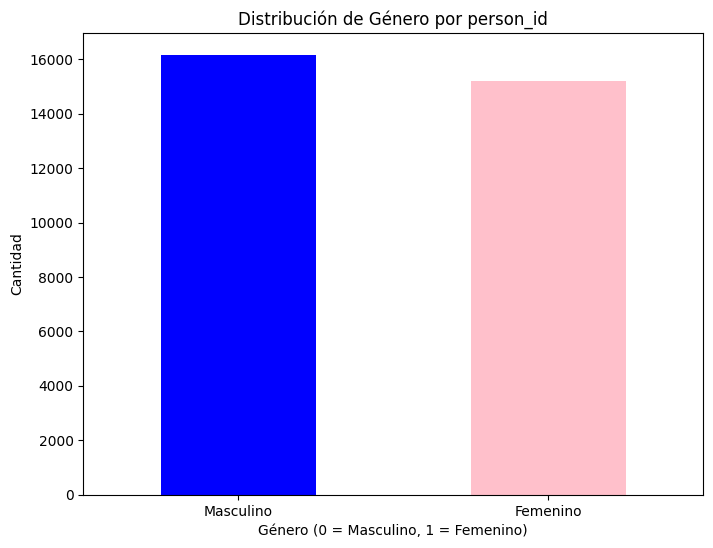

In [63]:
# Crear un gráfico de barras

# Contar la cantidad de personas por género
gender_counts = df_final['female'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribución de Género por person_id')
plt.xlabel('Género (0 = Masculino, 1 = Femenino)')
plt.ylabel('Cantidad')

# Establecer las ubicaciones de las marcas y las etiquetas del eje x
plt.xticks([0, 1], ['Masculino', 'Femenino'], rotation=0)

plt.show()

c:\Users\cjgarcia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cjgarcia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cjgarcia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


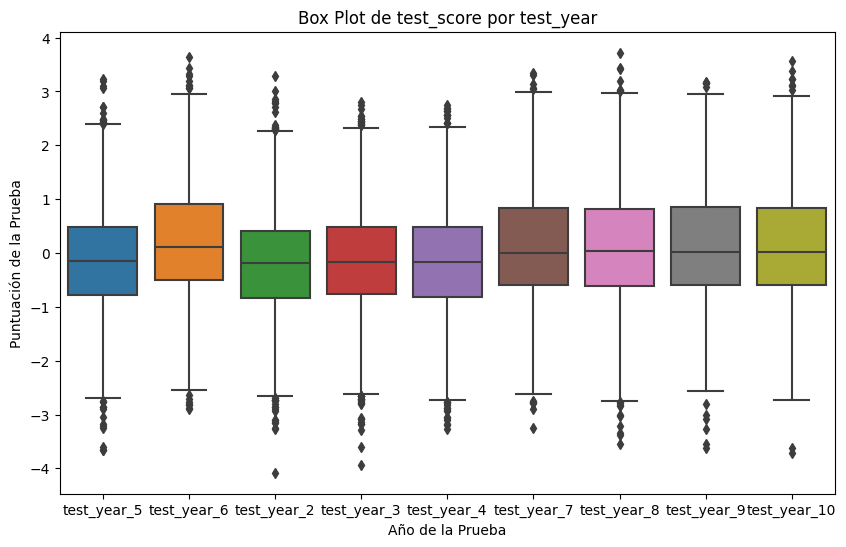

In [64]:
# Crear un box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final, x='test_year', y='test_score')
plt.title('Box Plot de test_score por test_year')
plt.xlabel('Año de la Prueba')
plt.ylabel('Puntuación de la Prueba')
plt.show()

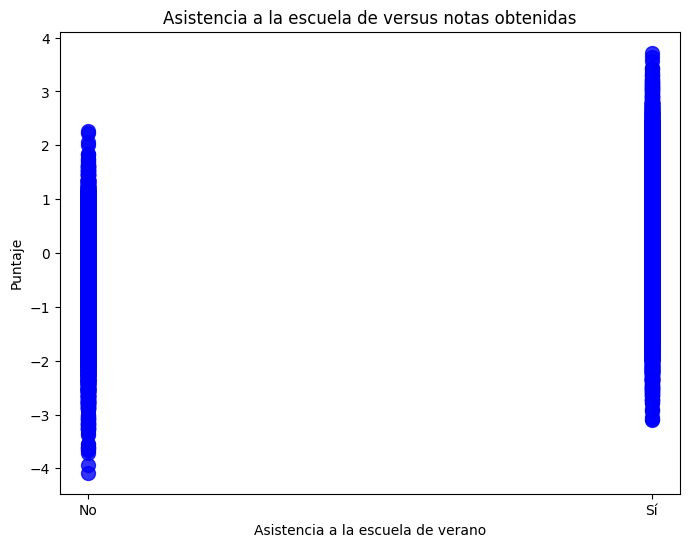

In [65]:
# Crear un scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_final['summer_school'], df_final['test_score'], c='blue', marker='o', s=100, alpha=0.8)
plt.title('Asistencia a la escuela de versus notas obtenidas')
plt.xlabel('Asistencia a la escuela de verano')
plt.ylabel('Puntaje')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()